In [2]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv(r"C:\Users\omsid\OneDrive\Desktop\ml_59\ML_lab_59-1\asssi3.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.shape

(4238, 15)

In [14]:
df.drop("education",axis=1,inplace=True)
df.head(2)

KeyError: "['education'] not found in axis"

In [16]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

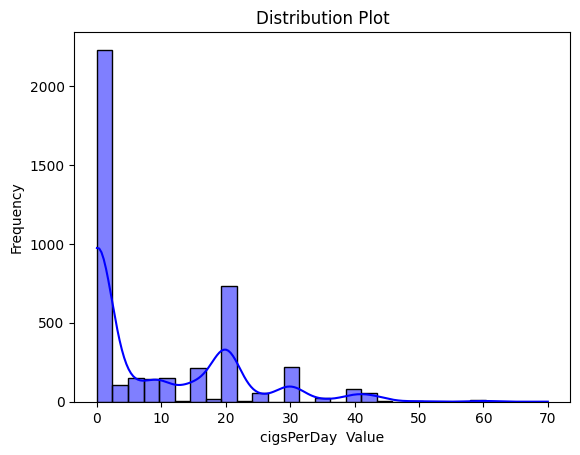

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = df.cigsPerDay 

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [20]:
median_value_cigsPerDay = df['cigsPerDay'].median()

print("Median:", median_value_cigsPerDay)

Median: 0.0


In [22]:
df['cigsPerDay'].fillna(median_value_cigsPerDay , inplace=True)


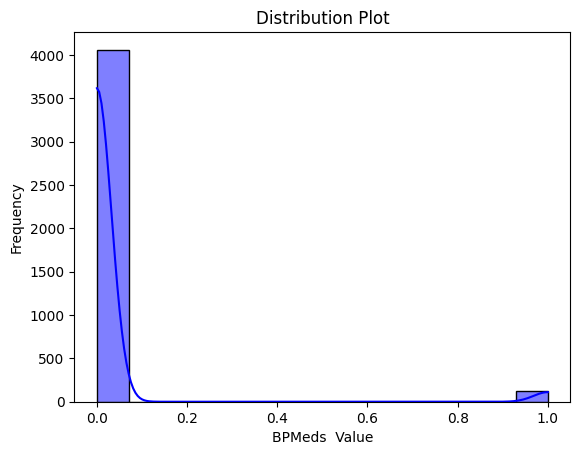

In [24]:
data = df.BPMeds

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('BPMeds  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [26]:
df["BPMeds"].fillna(0,inplace=True)


In [28]:
df.isnull().sum()


male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

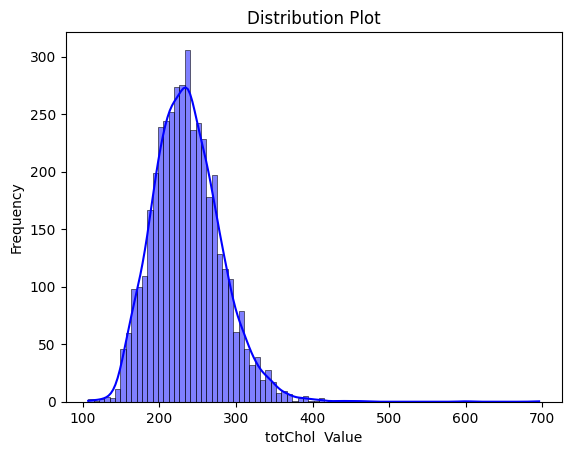

In [30]:
data = df.totChol

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('totChol  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [32]:

mean_value = df['totChol'].mean()

print("Mean:", mean_value)

Mean: 236.72158548233045


In [34]:
df["totChol"].fillna(mean_value,inplace=True)


In [37]:
mean_value = df['heartRate'].mean()

df["heartRate"].fillna(mean_value,inplace=True)
df.isnull().sum()




male                 0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

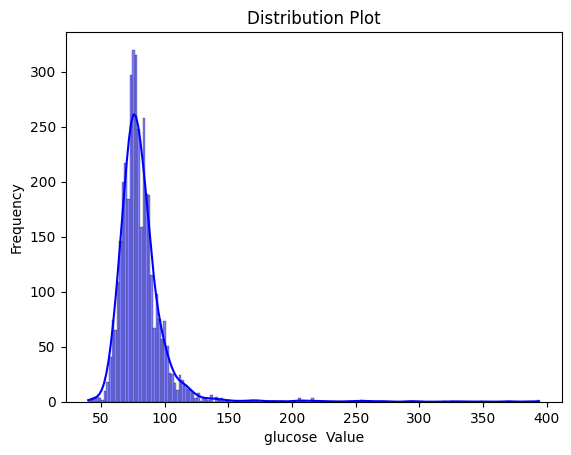

In [40]:
data = df.glucose

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('glucose  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [42]:
df_cleaned = df.dropna(subset=['glucose','BMI'])
df_cleaned.shape

(3836, 15)

In [44]:
correlation_matrix = df_cleaned.corr()
correlation_matrix

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027869,0.203662,0.323644,-0.050969,-0.005171,-0.000055,0.012723,-0.072819,-0.047689,0.051553,0.075660,-0.116506,0.003202,0.091857
age,-0.027869,1.000000,-0.214074,-0.190689,0.128799,0.053946,0.307889,0.107786,0.262660,0.389572,0.202728,0.136039,-0.006484,0.120015,0.232019
currentSmoker,0.203662,-0.214074,1.000000,0.764173,-0.052082,-0.040047,-0.107502,-0.048326,-0.049271,-0.135983,-0.115680,-0.161747,0.055923,-0.055318,0.020070
cigsPerDay,0.323644,-0.190689,0.764173,1.000000,-0.045028,-0.036685,-0.068319,-0.040026,-0.031912,-0.094171,-0.059525,-0.092683,0.066996,-0.058672,0.056928
BPMeds,-0.050969,0.128799,-0.052082,-0.045028,1.000000,0.108688,0.259543,0.055858,0.087950,0.265513,0.196470,0.103831,0.009698,0.051760,0.083389
prevalentStroke,-0.005171,0.053946,-0.040047,-0.036685,0.108688,1.000000,0.067948,0.008578,0.015755,0.059887,0.047718,0.030591,-0.021460,0.024347,0.054021
prevalentHyp,-0.000055,0.307889,-0.107502,-0.068319,0.259543,0.067948,1.000000,0.081352,0.165972,0.700005,0.615759,0.301862,0.142728,0.085085,0.180465
diabetes,0.012723,0.107786,-0.048326,-0.040026,0.055858,0.008578,0.081352,1.000000,0.043028,0.106106,0.050306,0.096126,0.060920,0.613062,0.094012
totChol,-0.072819,0.262660,-0.049271,-0.031912,0.087950,0.015755,0.165972,0.043028,1.000000,0.214698,0.168091,0.113158,0.096577,0.046497,0.093905
sysBP,-0.047689,0.389572,-0.135983,-0.094171,0.265513,0.059887,0.700005,0.106106,0.214698,1.000000,0.784934,0.329101,0.182049,0.131752,0.220718


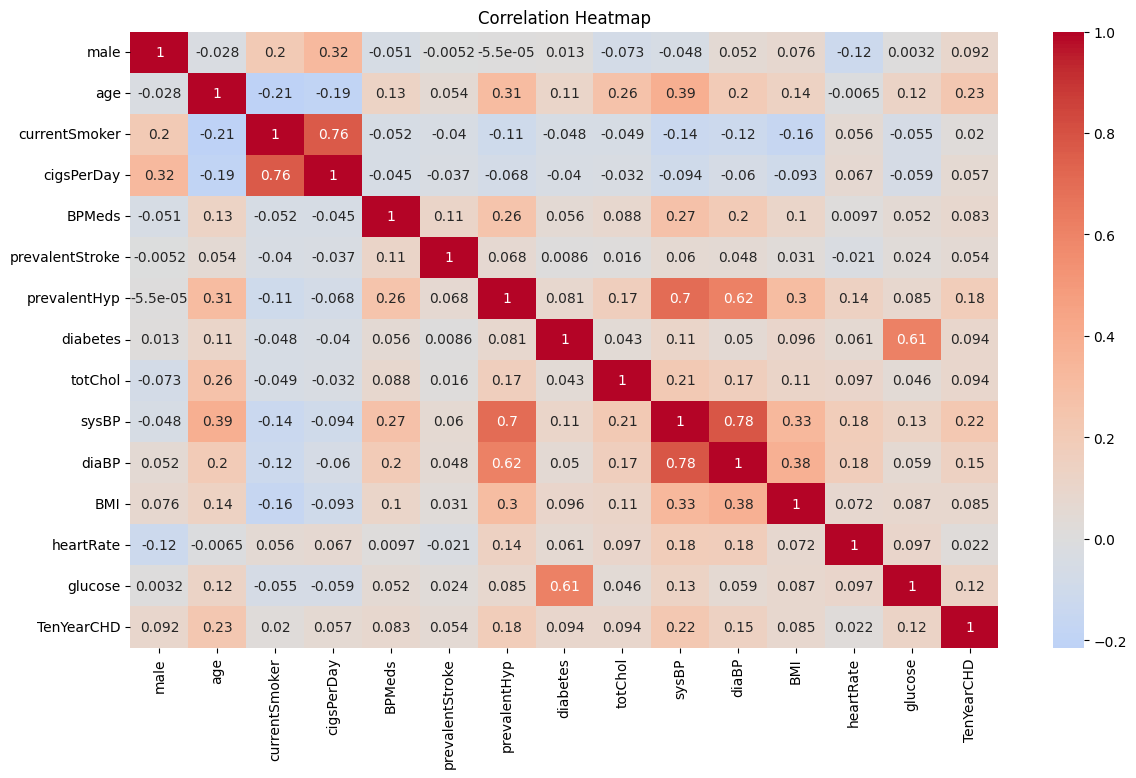

In [46]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
df_cleaned2 = df_cleaned.drop(columns=['currentSmoker'])
df_cleaned2.shape

(3836, 14)

In [51]:
from sklearn.model_selection import train_test_split
X = df_cleaned2.drop(columns=["TenYearCHD"])
y=df_cleaned2.TenYearCHD
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8489583333333334


In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import confusion_matrix



In [65]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       644
           1       0.90      0.07      0.13       124

    accuracy                           0.85       768
   macro avg       0.87      0.54      0.53       768
weighted avg       0.86      0.85      0.79       768



In [73]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[''],
            yticklabels=[''])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

NameError: name 'cm' is not defined

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[643   1]
 [115   9]]


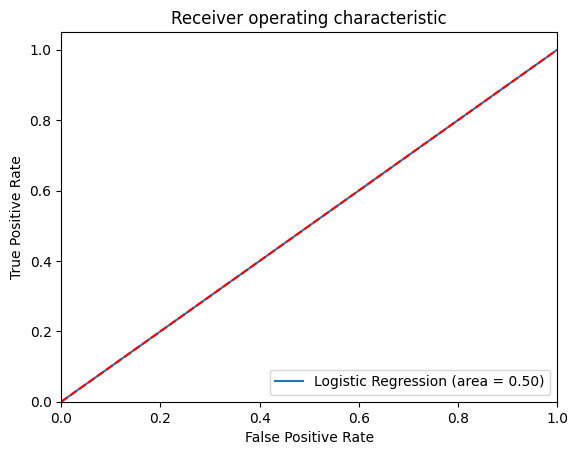

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()